행정구역 의료기관 현황분석하기

In [1]:
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt


파일을 불러와보자 (2025년 상반기 자료)
파일이 깨지면 encoding='cp949' 해줘야해.

In [10]:
data=pd.read_csv('../data4/공공보건의료기관현황.csv', encoding='cp949') 
data 

,연번,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
0,1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
1,2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
2,3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
3,4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
4,5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,216,청풍호노인사랑병원,시군구립,제천시 노인전문병원 설치및 운영에 관한 조례,충청북도,해당없음,33280576,요양병원,187,27207,충청북도 제천시 금성면 청풍호로 1147,www.cplove.co.kr,043-646-0808,043-648-5827,NaN
223,217,충주시 노인전문병원,시군구립,충주시노인전문병원설치 및 운영에관한 조례,충청북도,해당없음,33280088,요양병원,300,27442,충청북도 충주시 동량면 대전리 1686-28,www.hyolife.com,043-855-9393,043-855-8866,NaN
224,218,충청북도 충주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,충청북도,해당없음,33100063,종합병원,292,27468,충청북도 충주시 안림로 239-50(안림동 134),www.cjmct.or.kr,043-871-0114,043-843-4231,NaN
225,219,영동군립노인전문병원,시군구립,영동군립노인전문병원설치 및 운영조례,충청북도,해당없음,33280681,요양병원,120,29131,충청북도 영동군 영동읍 대학로 290,cmisilveryd.com,043-744-9633,043-742-8275,NaN


주소 데이터 뽑기

주소줄로 데이터 프레임 만들었어!!
각 구당 의료기관 수를 알고 싶은 거니까 주소만 가지고 오면 됨. 이름은 필요 없어.
x가 입력값. 주소 필드 값 하나하나가 x임. split을 () 안에 아무것도 안넣으면 공백으로 나누겠다.
0-:2까지까 0,1만 가지고 와서 -> 전체가 데이터프레임의 값이 됨.

In [11]:
addr=pd.DataFrame(data['주소'].apply(lambda x: x.split()[:2]).tolist(), columns=['시도','군구']) 
#람다 x는 주소 1개를 입력값으로 하겠다. x.공백으로 나누겠다. 리스트에 넣겠다.
#data['주소'].apply(lambda x: x.split()[:2]) 데이터 프레임의 데이터이고, 컬럼명이고 
addr

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시
...,...,...
222,충청북도,제천시
223,충청북도,충주시
224,충청북도,충주시
225,충청북도,영동군


옛날 입력 데이터를 전산화 할 때, 지역명을 제각각 써서 정리해줄 필요가 있어. 잘못된 데이터를 바로 잡을 필요가 있어.
광역시도가 아닌 것을 정리해서 나열해보자.

In [12]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [13]:
addr[addr['시도']=='창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


27번째 줄 수정, 31번째 줄

In [14]:
addr.iloc[27]=['경상남도','창원시']
addr.iloc[31]=['경상남도','창원시']

수정하니까 창원시가 사라짐.

In [15]:
addr[addr['시도']=='창원시']

,시도,군구


In [16]:
addr[addr['시도']=='경산시']

,시도,군구
47,경산시,경안로


In [17]:
addr.iloc[47]=['경상북도','경산시']

In [10]:
addr[addr['시도']=='경산시']

,시도,군구


In [18]:
addr[addr['시도']=='천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [19]:
addr.iloc[209]=['충청남도','천안시']
addr.iloc[210]=['충청남도','천안시']

In [20]:
addr[addr['시도']=='천안시']

,시도,군구


데이터 이름 맞춰주자 부산 부르는게 너무 많다.

In [21]:
addr_aliases={'서울시':'서울특별시', 
              '부산특별시':'부산광역시',
              '경기':'경기도',
              '경남':'경상남도',
              '경북':'경상북도',
              '충남':'충청남도',
              '충북':'충청북도',
              '전남':'전라남도',
              '전북':'전북특별자치도',
              '전라북도':'전북특별자치도',
              '강원도':'강원특별자치도'
              }
addr['시도']=addr['시도'].replace(addr_aliases)
addr['시도'].unique()

array(['강원특별자치도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도',
       '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전북특별자치도', '충청북도', '서울특별시',
       '대전시', '충청남도', '울산광역시'], dtype=object)

In [26]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구', '노원구',
       '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구',
       '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구',
       '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군',
       '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시',
       '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군', '홍성군',
     

아란13길이 시군구 잘못된거야. 제주 특별자치도

In [23]:
addr[addr['군구']=='마산합포구3.15대로']


,시도,군구


In [24]:
addr.iloc[31]=['경상남도','창원시']
addr[addr['군구']=='마산합포구3.15대로']

,시도,군구


In [25]:
addr[addr['군구']=='아란13길']
addr.iloc[75] =['제주특별자치도','제주시']
addr[addr['군구']=='아란13길']

,시도,군구


시군구 공공의료기관 카운팅할거야
시도군구 하나의 필드로 만들어서 그룹바이하자. 대구 부산 서울 중구 다있어.

In [27]:
addr['시도군구']=addr['시도']+' '+addr['군구']
addr

,시도,군구,시도군구
0,강원특별자치도,춘천시,강원특별자치도 춘천시
1,강원특별자치도,삼척시,강원특별자치도 삼척시
2,강원특별자치도,영월군,강원특별자치도 영월군
3,강원특별자치도,원주시,강원특별자치도 원주시
4,강원특별자치도,강릉시,강원특별자치도 강릉시
...,...,...,...
222,충청북도,제천시,충청북도 제천시
223,충청북도,충주시,충청북도 충주시
224,충청북도,충주시,충청북도 충주시
225,충청북도,영동군,충청북도 영동군


카운트 해보자, count 필드를 미리 만들자.

In [28]:
addr['count']=0
addr

,시도,군구,시도군구,count
0,강원특별자치도,춘천시,강원특별자치도 춘천시,0
1,강원특별자치도,삼척시,강원특별자치도 삼척시,0
2,강원특별자치도,영월군,강원특별자치도 영월군,0
3,강원특별자치도,원주시,강원특별자치도 원주시,0
4,강원특별자치도,강릉시,강원특별자치도 강릉시,0
...,...,...,...,...
222,충청북도,제천시,충청북도 제천시,0
223,충청북도,충주시,충청북도 충주시,0
224,충청북도,충주시,충청북도 충주시,0
225,충청북도,영동군,충청북도 영동군,0


as_index=False 인덱스는 빼겠다는 말이야. 의료기관을 카운트해보자.

In [34]:
addr_group=addr.groupby(['시도','군구','시도군구'],as_index=False).count()
addr_group

,시도,군구,시도군구,count
0,강원특별자치도,강릉시,강원특별자치도 강릉시,4
1,강원특별자치도,동해시,강원특별자치도 동해시,1
2,강원특별자치도,삼척시,강원특별자치도 삼척시,1
3,강원특별자치도,속초시,강원특별자치도 속초시,1
4,강원특별자치도,양구군,강원특별자치도 양구군,1
...,...,...,...,...
136,충청북도,영동군,충청북도 영동군,1
137,충청북도,제천시,충청북도 제천시,1
138,충청북도,청원군,충청북도 청원군,1
139,충청북도,청주시,충청북도 청주시,4


시도군구를 인덱스로 만들어보자. addr 그룹에 적용되게 inplace=True 하자.

In [35]:
addr_group.set_index('시도군구',inplace=True)
addr_group

,시도,군구,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4
강원특별자치도 동해시,강원특별자치도,동해시,1
강원특별자치도 삼척시,강원특별자치도,삼척시,1
강원특별자치도 속초시,강원특별자치도,속초시,1
강원특별자치도 양구군,강원특별자치도,양구군,1
...,...,...,...
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1
충청북도 청원군,충청북도,청원군,1


In [36]:
addr_group

,시도,군구,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4
강원특별자치도 동해시,강원특별자치도,동해시,1
강원특별자치도 삼척시,강원특별자치도,삼척시,1
강원특별자치도 속초시,강원특별자치도,속초시,1
강원특별자치도 양구군,강원특별자치도,양구군,1
...,...,...,...
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1
충청북도 청원군,충청북도,청원군,1


In [39]:
population=pd.read_excel('../data4/행정구역_시군구_별__성별_인구수_2.xlsx')
population

,시도,군구,총인구수,남자인구수,여자인구수
0,전국,합계,51313912,25558944,25754968
1,서울특별시,소계,9384325,4538354,4845971
2,서울특별시,종로구,139378,67240,72138
3,서울특별시,중구,121322,58651,62671
4,서울특별시,용산구,212175,101793,110382
...,...,...,...,...,...
288,경상남도,거창군,59909,29480,30429
289,경상남도,합천군,41096,20094,21002
290,제주특별자치도,소계,674353,337578,336775
291,제주특별자치도,제주시,490888,245197,245691


공백들이 많아!!!
그냥 기계적으로 공백 날리자. 1. unique 해보고 양쪽 가장자리 공백있는지 확인하고, 이름이 같은지 확인하고, 날리자.

In [40]:
population['군구']=population['군구'].apply(lambda x:x.strip())
population['시도']=population['시도'].apply(lambda x:x.strip())

총 인구수 0인 곳 제거

In [46]:
population['시도'].unique()
population['군구'].unique() #출장소라는 것들이 생겼어. 지워야하는데!!
population.loc[population['총인구수']==0]

,시도,군구,총인구수,남자인구수,여자인구수,시도군구


0인 출장소를 다 지워보자. 잘 지워졌다!

In [45]:
population=population.loc[population['총인구수']!=0,:]

In [44]:
addr['시도'].unique()
addr['군구'].unique()



array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구', '노원구',
       '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구',
       '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구',
       '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군',
       '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시',
       '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군', '홍성군',
     

인덱스로 두개를 합쳐서 작업할거라면 맞는지 확인을 해야해!!!!!

In [48]:
population['시도군구']=population['시도']+' '+population['군구']


C:\Users\it\AppData\Local\Temp\ipykernel_10948\2720684118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['시도군구']=population['시도']+' '+population['군구']


,시도,군구,총인구수,남자인구수,여자인구수,시도군구
0,전국,합계,51313912,25558944,25754968,전국 합계
1,서울특별시,소계,9384325,4538354,4845971,서울특별시 소계
2,서울특별시,종로구,139378,67240,72138,서울특별시 종로구
3,서울특별시,중구,121322,58651,62671,서울특별시 중구
4,서울특별시,용산구,212175,101793,110382,서울특별시 용산구
...,...,...,...,...,...,...
288,경상남도,거창군,59909,29480,30429,경상남도 거창군
289,경상남도,합천군,41096,20094,21002,경상남도 합천군
290,제주특별자치도,소계,674353,337578,336775,제주특별자치도 소계
291,제주특별자치도,제주시,490888,245197,245691,제주특별자치도 제주시


In [49]:
population

,시도,군구,총인구수,남자인구수,여자인구수,시도군구
0,전국,합계,51313912,25558944,25754968,전국 합계
1,서울특별시,소계,9384325,4538354,4845971,서울특별시 소계
2,서울특별시,종로구,139378,67240,72138,서울특별시 종로구
3,서울특별시,중구,121322,58651,62671,서울특별시 중구
4,서울특별시,용산구,212175,101793,110382,서울특별시 용산구
...,...,...,...,...,...,...
288,경상남도,거창군,59909,29480,30429,경상남도 거창군
289,경상남도,합천군,41096,20094,21002,경상남도 합천군
290,제주특별자치도,소계,674353,337578,336775,제주특별자치도 소계
291,제주특별자치도,제주시,490888,245197,245691,제주특별자치도 제주시


시도 군구의 합계, 소계 데이터를 빼보자.
합계 아닌 것을 골라보자.

In [50]:
population=population[population['군구']!='합계']
population=population[population['군구']!='소계'] 
population

,시도,군구,총인구수,남자인구수,여자인구수,시도군구
2,서울특별시,종로구,139378,67240,72138,서울특별시 종로구
3,서울특별시,중구,121322,58651,62671,서울특별시 중구
4,서울특별시,용산구,212175,101793,110382,서울특별시 용산구
5,서울특별시,성동구,277090,134390,142700,서울특별시 성동구
6,서울특별시,광진구,335335,161154,174181,서울특별시 광진구
...,...,...,...,...,...,...
287,경상남도,함양군,36873,17894,18979,경상남도 함양군
288,경상남도,거창군,59909,29480,30429,경상남도 거창군
289,경상남도,합천군,41096,20094,21002,경상남도 합천군
291,제주특별자치도,제주시,490888,245197,245691,제주특별자치도 제주시


시도군구를 인덱스로 만들거야.

In [51]:
population.set_index('시도군구', inplace=True)
population

,시도,군구,총인구수,남자인구수,여자인구수
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,139378,67240,72138
서울특별시 중구,서울특별시,중구,121322,58651,62671
서울특별시 용산구,서울특별시,용산구,212175,101793,110382
서울특별시 성동구,서울특별시,성동구,277090,134390,142700
서울특별시 광진구,서울특별시,광진구,335335,161154,174181
...,...,...,...,...,...
경상남도 함양군,경상남도,함양군,36873,17894,18979
경상남도 거창군,경상남도,거창군,59909,29480,30429
경상남도 합천군,경상남도,합천군,41096,20094,21002


인덱스로 join을 해보자.
inner join은 맞는 조건만 조인해줘.

on=조건써

merge(합병할 데이터1, 데이터2, on=조건, how="어떤 조인")

In [52]:
merged=pd.merge(addr_group, population, on='시도군구', how='inner') #양테이블에 있는 것을 가지고 와

merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 강원특별자치도 강릉시 to 충청북도 충주시
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도_x    138 non-null    object
 1   군구_x    138 non-null    object
 2   count   138 non-null    int64 
 3   시도_y    138 non-null    object
 4   군구_y    138 non-null    object
 5   총인구수    138 non-null    int64 
 6   남자인구수   138 non-null    int64 
 7   여자인구수   138 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 9.7+ KB


In [53]:
addr_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 강원특별자치도 강릉시 to 충청북도 충주시
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      141 non-null    object
 1   군구      141 non-null    object
 2   count   141 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.4+ KB


In [54]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 서울특별시 종로구 to 제주특별자치도 서귀포시
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      264 non-null    object
 1   군구      264 non-null    object
 2   총인구수    264 non-null    int64 
 3   남자인구수   264 non-null    int64 
 4   여자인구수   264 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.4+ KB


조인된 것을 확인할 수 있어. 데이터가 중복되는 것을 확인 할 수 있어

In [55]:
merged

,시도_x,군구_x,count,시도_y,군구_y,총인구수,남자인구수,여자인구수
시도군구,,,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,강원특별자치도,강릉시,209174,103616,105558
강원특별자치도 동해시,강원특별자치도,동해시,1,강원특별자치도,동해시,88591,45007,43584
강원특별자치도 삼척시,강원특별자치도,삼척시,1,강원특별자치도,삼척시,62309,31645,30664
강원특별자치도 속초시,강원특별자치도,속초시,1,강원특별자치도,속초시,82021,40606,41415
강원특별자치도 양구군,강원특별자치도,양구군,1,강원특별자치도,양구군,20975,10994,9981
...,...,...,...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,충청북도,단양군,27680,14076,13604
충청북도 영동군,충청북도,영동군,1,충청북도,영동군,44120,22138,21982
충청북도 제천시,충청북도,제천시,1,충청북도,제천시,129852,65296,64556


우리가 필요한 것은 필드만 골라보자. 중복된거 삭제.

In [56]:
merged=merged[['시도_x','군구_x', 'count', '총인구수']]
merged

,시도_x,군구_x,count,총인구수
시도군구,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,209174
강원특별자치도 동해시,강원특별자치도,동해시,1,88591
강원특별자치도 삼척시,강원특별자치도,삼척시,1,62309
강원특별자치도 속초시,강원특별자치도,속초시,1,82021
강원특별자치도 양구군,강원특별자치도,양구군,1,20975
...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,27680
충청북도 영동군,충청북도,영동군,1,44120
충청북도 제천시,충청북도,제천시,1,129852


소수점이 너무 많이 지니까 인구 10만명당으로 곱해줘.
총 인구수 대비 의료기관의 비율을 구해봄.

In [57]:
merged['ratio']=merged['count']/merged['총인구수']*100000
merged

C:\Users\it\AppData\Local\Temp\ipykernel_10948\3776724502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['ratio']=merged['count']/merged['총인구수']*100000


,시도_x,군구_x,count,총인구수,ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,209174,1.912284
강원특별자치도 동해시,강원특별자치도,동해시,1,88591,1.128783
강원특별자치도 삼척시,강원특별자치도,삼척시,1,62309,1.604905
강원특별자치도 속초시,강원특별자치도,속초시,1,82021,1.219200
강원특별자치도 양구군,강원특별자치도,양구군,1,20975,4.767580
...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,27680,3.612717
충청북도 영동군,충청북도,영동군,1,44120,2.266546
충청북도 제천시,충청북도,제천시,1,129852,0.770108


그래프를 그려보자.

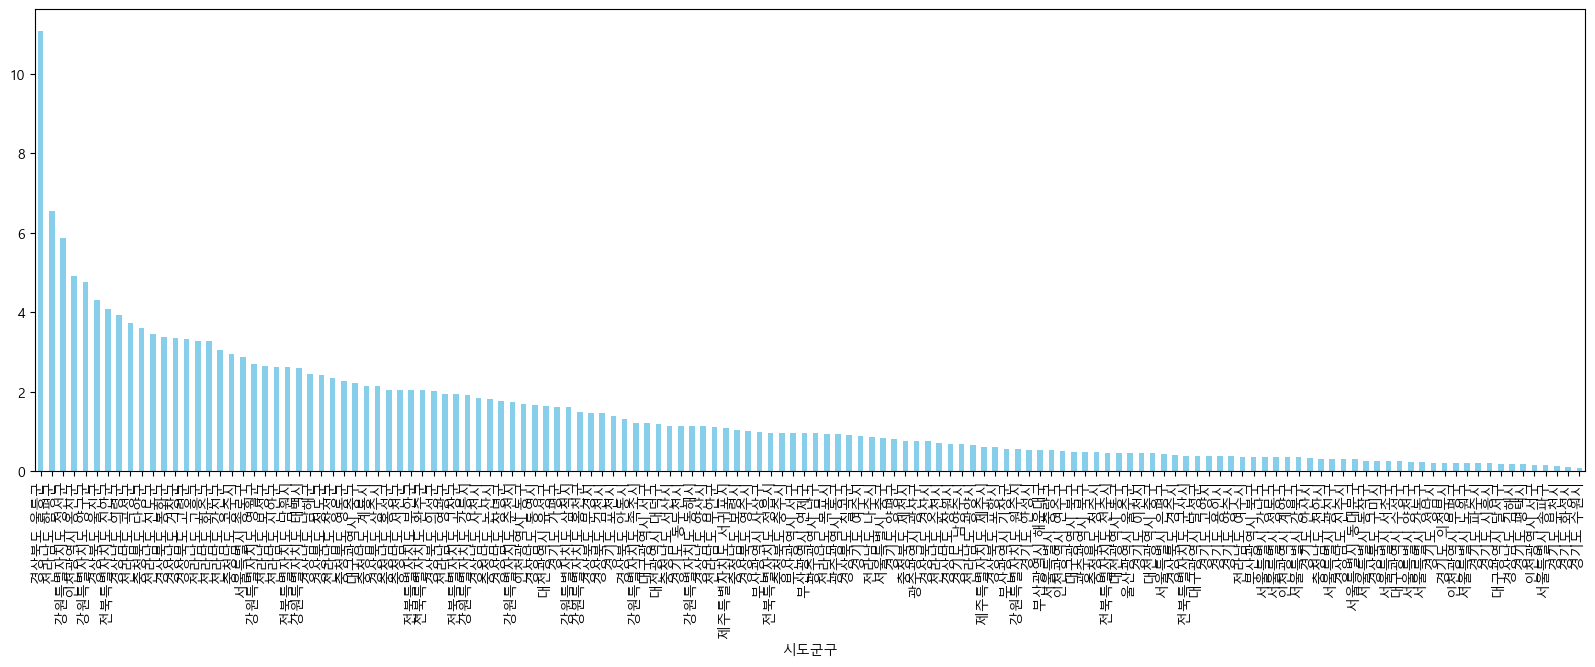

In [58]:
plt.rcParams['font.family']='Malgun Gothic'
plt.figure(figsize=(20,6))
mc_ratio=merged['ratio'].sort_values(ascending=False)
mc_ratio.plot(kind='bar', color='skyblue', rot=90)
plt.show()

data_draw_korea.csv 파일을 불러보자.

In [64]:
data_draw_korea=pd.read_csv('../data4/data_draw_korea.csv', index_col=0)
data_draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
224,127462,제천,8,10,882.47,충청북도,제천시
225,34480,증평,6,11,81.84,충청북도,증평군
226,62809,진천,5,11,406.08,충청북도,진천군
227,790216,청주,6,12,932.51,충청북도,청주시


고치기전에 unique 보자. merged와 비교해봐.

In [60]:
data_draw_korea['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [61]:
merged['시도_x'].unique()

array(['강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '울산광역시', '인천광역시', '전라남도', '전북특별자치도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

이름 확인하고 맞출거 맞추자

In [70]:
addr_aliases={'강원도':'강원특별자치도', '전라북도':'전북특별자치도'}
data_draw_korea['광역시도']=data_draw_korea['광역시도'].replace(addr_aliases)
data_draw_korea['광역시도'].unique()

array(['강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전북특별자치도',
       '제주특별자치도', '충청남도', '충청북도'], dtype=object)

In [72]:
data_draw_korea['시도군구']=data_draw_korea['광역시도']+' '+data_draw_korea['행정구역']
data_draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역,시도군구
시도군구,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원특별자치도,강릉시,강원특별자치도 강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원특별자치도,고성군,강원특별자치도 고성군
강원도 동해시,86747,동해,11,5,180.01,강원특별자치도,동해시,강원특별자치도 동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원특별자치도,삼척시,강원특별자치도 삼척시
강원도 속초시,76733,속초,9,1,105.25,강원특별자치도,속초시,강원특별자치도 속초시
...,...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시,충청북도 제천시
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군,충청북도 증평군
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군,충청북도 진천군


In [73]:
data_draw_korea.set_index('시도군구',inplace=True)
data_draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원특별자치도 강릉시,202520,강릉,11,4,1040.07,강원특별자치도,강릉시
강원특별자치도 고성군,25589,고성(강원),9,0,664.19,강원특별자치도,고성군
강원특별자치도 동해시,86747,동해,11,5,180.01,강원특별자치도,동해시
강원특별자치도 삼척시,63986,삼척,11,8,1185.80,강원특별자치도,삼척시
강원특별자치도 속초시,76733,속초,9,1,105.25,강원특별자치도,속초시
...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군


outer 조인을 함. data_draw_korea에 비어있는 것은 nan 처리

In [74]:
data_merge=pd.merge(data_draw_korea, merged, on='시도군구', how='outer')
data_merge

,인구수,shortName,x,y,면적,광역시도,행정구역,시도_x,군구_x,count,총인구수,ratio
시도군구,,,,,,,,,,,,
강원특별자치도 강릉시,202520,강릉,11,4,1040.07,강원특별자치도,강릉시,강원특별자치도,강릉시,4.0,209174.0,1.912284
강원특별자치도 고성군,25589,고성(강원),9,0,664.19,강원특별자치도,고성군,NaN,NaN,NaN,NaN,NaN
강원특별자치도 동해시,86747,동해,11,5,180.01,강원특별자치도,동해시,강원특별자치도,동해시,1.0,88591.0,1.128783
강원특별자치도 삼척시,63986,삼척,11,8,1185.80,강원특별자치도,삼척시,강원특별자치도,삼척시,1.0,62309.0,1.604905
강원특별자치도 속초시,76733,속초,9,1,105.25,강원특별자치도,속초시,강원특별자치도,속초시,1.0,82021.0,1.219200
...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시,충청북도,제천시,1.0,129852.0,0.770108
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군,NaN,NaN,NaN,NaN,NaN
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군,NaN,NaN,NaN,NaN,NaN


바운더 좌표를 선생님 카톡으로 전달받았어.

In [75]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [ (2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9),
    (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
    (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
    (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
    (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
    (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [ (19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], #광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [ (16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], #부산시
]

블록맵 그리는 함수
블록맵 으로 검색해서 가지고 오면 됨. 블랙라인으로 경계선 단순화 시킨것.

파라미터로 요런 데이터를 받고 그림을 그릴거야.
x, y 값을 y는 인덱스 x는 컬럼으로 값을 잡은거야.
동해시(11,어쩌구) 였으면 x11에 y 잡으면 동해시.

In [78]:
def draw_blockmap(blockedMap, target, title, color):
  whitelabelmin=(max(blockedMap[target])-min(blockedMap[target]))*0.25+min(blockedMap[target]) #글자 흰거되는 경계값, target은 변수
  datalabel=target
  vmin=min(blockedMap[target])
  vmax=min(blockedMap[target])
  matdata=blockedMap.pivot(index='y', columns='x', values=target)
  print(matdata)


데이터는 data_merge로, 카운트랑 비율로 그릴거야.
짙은 색의 값을 가질때, 글자 색을 흰색으로 가진다고 지정. 높은 값-낮은값 *0.25 + 최소값최소 경계

카운트로 의료기관 수 있는데 없는데 카운트 한거야.

In [79]:
draw_blockmap(data_merge, 'count', '행정구역별 공공의료기관 수', 'Blues')

x    0    1    2    3    4    5    6    7    8    9    10   11   12   13
y                                                                       
0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN
1   NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  2.0  1.0  NaN  NaN  NaN  NaN
2   NaN  NaN  NaN  1.0  4.0  1.0  NaN  1.0  1.0  NaN  NaN  NaN  NaN  NaN
3   NaN  NaN  NaN  NaN  2.0  NaN  4.0  1.0  5.0  1.0  5.0  NaN  NaN  NaN
4   NaN  1.0  1.0  NaN  NaN  NaN  1.0  1.0  2.0  NaN  1.0  4.0  NaN  NaN
5   NaN  1.0  1.0  1.0  1.0  1.0  NaN  1.0  1.0  NaN  NaN  1.0  NaN  NaN
6   NaN  NaN  1.0  2.0  NaN  NaN  1.0  1.0  1.0  1.0  NaN  2.0  NaN  1.0
7   NaN  NaN  NaN  1.0  NaN  NaN  2.0  NaN  NaN  1.0  2.0  1.0  NaN  NaN
8   1.0  2.0  NaN  NaN  1.0  NaN  NaN  2.0  1.0  1.0  1.0  1.0  NaN  NaN
9   NaN  NaN  NaN  NaN  2.0  1.0  1.0  4.0  2.0  NaN  1.0  1.0  2.0  NaN
10  NaN  2.0  2.0  NaN  3.0  NaN  2.0  1.0  1.0  1.0  2.0  NaN  NaN  NaN
11  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  2.0  Na

In [80]:
def draw_blockmap(blockedMap, target, title, color):
  whitelabelmin=(max(blockedMap[target])-min(blockedMap[target]))*0.25+min(blockedMap[target]) #글자 흰거되는 경계값, target은 변수
  datalabel=target
  vmin=min(blockedMap[target])
  vmax=min(blockedMap[target])
  matdata=blockedMap.pivot(index='y', columns='x', values=target)
  # print(matdata)
  masked_mapdata=np.ma.masked_where(np.isnan(matdata),matdata)
  print(masked_mapdata)

마스크가 씌워져서 값이 있는데만 표기가 됨.

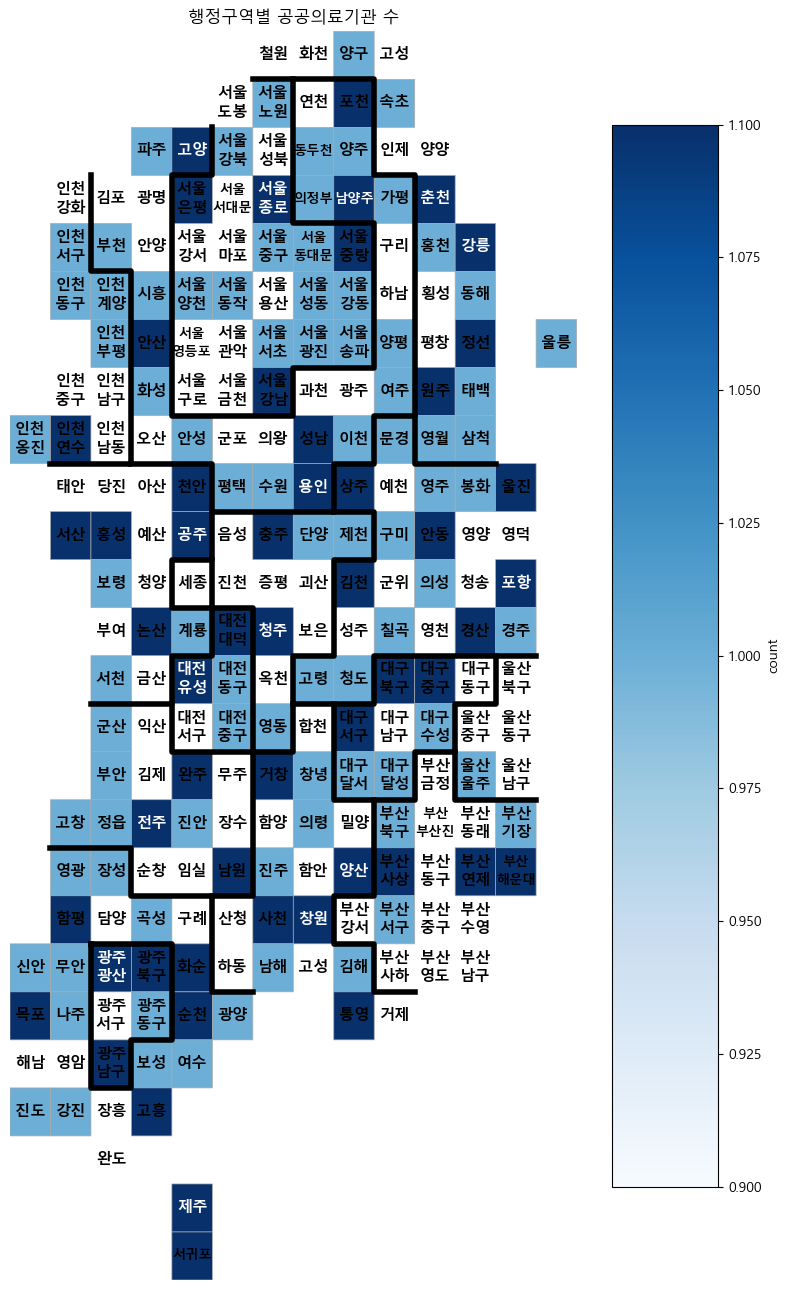

In [89]:
draw_blockmap(data_merge, 'count', '행정구역별 공공의료기관 수', 'Blues')

In [ ]:
def draw_blockmap(blockedMap, target, title, color):
  whitelabelmin=(max(blockedMap[target])-min(blockedMap[target]))*0.25+min(blockedMap[target]) #글자 흰거되는 경계값, target은 변수
  datalabel=target
  vmin=min(blockedMap[target])
  vmax=min(blockedMap[target])
  matdata=blockedMap.pivot(index='y', columns='x', values=target) #숫자쌍들을 지도 위에 뿌리고
  # print(matdata)
  masked_mapdata=np.ma.masked_where(np.isnan(matdata),matdata) #값 없는 것을 마스크 씌워
  # print(masked_mapdata)

  plt.figure(figsize=(8,13)) #그림을 그리고
  plt.title(title)
  
  plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

  for inx, row in blockedMap.iterrows(): #어노테이션 컬러가 어떨때 화이트 하는가
    annocolor='white' if row[target]>whitelabelmin else 'black'

      #행정구역을 어떻게 표시할 것인가 결정
      #문자 하나 넣고 한줄 띄우고 문자 하나 넣고 / 부산광역시에 부산 2글자 가져오고 한줄띄우고 /행정구역의 맨 마지막 글자 하나빼고 구 떼고, 
      #근데 남구 면 남만 남으니까 2자 이상인 것으로 조절
    if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'): #세종 빼고
      dispname='{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])  #{시도}\n{행정구역} 2칸으로 보이게
      #맨 마지막 글자만 자르자. 영등포구 -> 영등포
      if len(row['행정구역'])<=2: #2보다 작거나 같으면 
        dispname+=row['행정구역'][-1] #행정구역의 맨 마지막 글자를 다시 붙혀라. 남구면 남만 되니까 남구까지 표현
    else:
      dispname=row['행정구역'][:-1] #광역시도 외 그냥 붙혀(?)

    #파이썬은 변수에 값을 바로 대입가능해.
    if len(dispname.splitlines()[-1])>=3: #구명이 3개보다 크면 9, 글자 작게하고
      fontsize, linespacing=9.5, 1.5
    else:
      fontsize, linespacing=11,1.2 #아니면 글자를 11로

  #지도 안에 글자 표시
    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), #좌표에 0.5 더해진 위치에 글자 표시해라
                 weight='bold', fontsize=fontsize,
                 ha='center', va='center',
                 color=annocolor, linespacing=linespacing)
  #지도가 거꾸로 되지 않게, y좌표를 invert해라. 수학에서는 0.0이 아래인데 그래픽에서는 위에 있어.  
  plt.gca().invert_yaxis()
  plt.axis('off')

  cb=plt.colorbar(shrink=1, aspect=10)
  cb.set_label(datalabel)

  #좌표 라인은 인천좌표 다 찍고-> 안찍힌 일부만 경기도-> 서울 이렇게 왼쪽부터 그림그려
  for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=4)

  #차트에 위치 저장은 페스넣어서
  plt.tight_layout()
  plt.savefig('../data4/blickMap_' + target+'.png')
  plt.show()
    

      




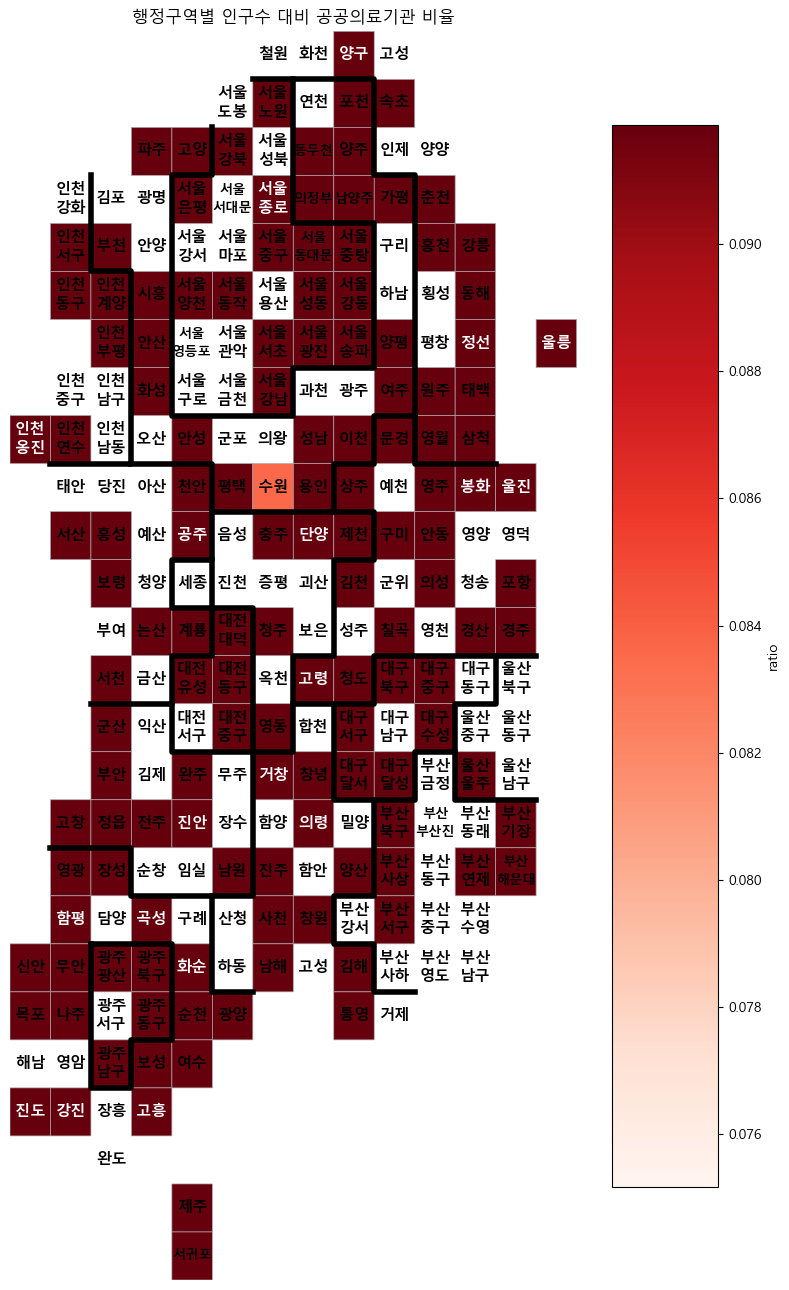

In [88]:
draw_blockmap(data_merge, 'ratio', '행정구역별 인구수 대비 공공의료기관 비율', 'Reds')